In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

In [9]:
# Setup seaborn
sns.set()
# Can be "paper", "talk", "poster", or "notebook"
# It scales things for the proper context
sns.set_context("talk")

In [6]:
# Constants related to the detector

BRICK_X = 124000
BRICK_Y = 99000
BRICK_Z = 75000
SAFE_M = 10000
dZ = 205

In [3]:
df = pd.read_csv('DS_2_train.csv', index_col=0)

/Users/re239/code/projects/mlhep/.env/lib/python2.7/site-packages/numpy/lib/arraysetops.py:463: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [4]:
df.head()

,event_id,X,Y,Z,TX,TY,chi2,signal,brick_number
index,,,,,,,,,
0,35130,50550.007812,66924.796875,65943.0,0.639179,-0.086816,0.583319,1.0,53
1,-999,48811.390625,65584.648438,12930.0,0.569996,0.294196,1.582101,0.0,49
2,-999,30120.525391,28329.425781,21981.0,-0.366648,-0.379520,1.292502,0.0,39
3,-999,67186.773438,23033.931641,68529.0,-0.434561,0.502130,2.832125,0.0,65
4,-999,64832.343750,64279.328125,7758.0,0.139993,-0.417299,2.959314,0.0,13


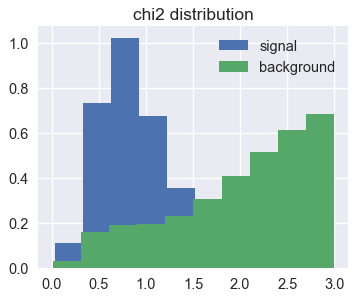

In [10]:
plt.figure(dpi = 80, figsize=(5,4))
first = plt.hist(df.chi2[df.signal == True], normed = True, label = 'signal')
second = plt.hist(df.chi2[df.signal == False], normed = True, label = 'background')
plt.title('chi2 distribution')
plt.legend()
plt.show()

In [11]:
def plot_bg_and_mc(pbg, pmc, id=0, step=1):
    df = pbg
    # mind the order!
    d0 = pd.DataFrame([
                df['Z'][::step],
                df['X'][::step],
                df['Y'][::step]],
                index=['z', 'x', 'y']).T
    numtracks = d0.shape[0]
    dd = pd.DataFrame([
            df['TX'][::step]*dZ,
            df['TY'][::step]*dZ],
            index=['x', 'y']).T
    dd.insert(loc=0, column='z', value=dZ)
    d1 = d0 + dd
    # print d0, d1
    C = plt.cm.Blues(0.5)
    lc_bg = Line3DCollection(list(zip(d0.values, d1.values)), colors=C, alpha=0.5, lw=2)

    df = pmc

    # mind the order!
    d0 = pd.DataFrame([
                df['Z'],
                df['X'],
                df['Y']],
                index=['z', 'x', 'y']).T
    numtracks = d0.shape[0]
    dd = pd.DataFrame([
            df['TX']*dZ,
            df['TY']*dZ],
            index=['x', 'y']).T
    dd.insert(loc=0, column='z', value=dZ)
    d1 = d0 + dd
    print(d1.shape)
    #print (d0)§
    C = plt.cm.Reds(0.5)
    lc_mc = Line3DCollection(list(zip(d0.values, d1.values)), colors=C, alpha=0.9, lw=2)
    
    fig = plt.figure(figsize=(12,8))
    ax = fig.gca(projection='3d')
    ax.view_init(azim=-50, elev=10)
    ax.add_collection3d(lc_mc)
    ax.add_collection3d(lc_bg)
    
    # mind the order!
    ax.set_xlabel("z")
    ax.set_ylabel("x")
    ax.set_zlabel("y")  
    ax.set_xlim(0, BRICK_Z)
    ax.set_ylim(0, BRICK_X)
    ax.set_zlim(0, BRICK_Y)

(2939, 3)


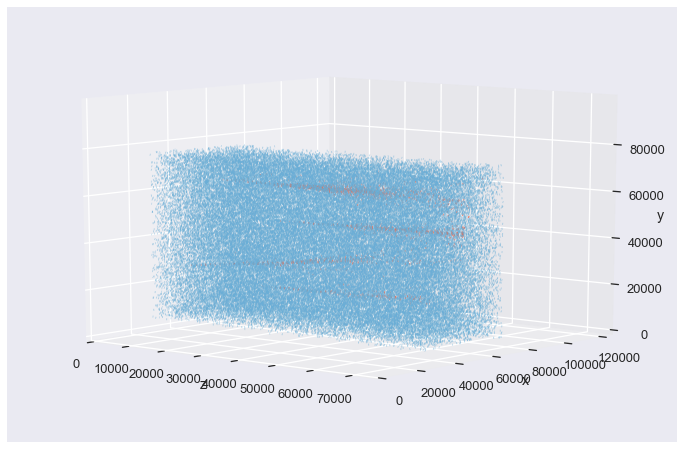

In [13]:
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Line3DCollection

plot_bg_and_mc(df[np.logical_and(df.brick_number == 1, df.signal == 0)], df[np.logical_and(df.brick_number == 1, df.signal == 1)])

In [14]:
df.brick_number.unique()

array([ 53,  49,  39,  65,  13,  24,  22,  51,   7,  64,  68,  17,  54,
       100,  63,   1,  11,  16,  12,  35,  78,  23,  77,  29,  59,  67,
        72,  79,  95,  66,  87,  30,  14,  52,  33,  85,  47,   9,  94,
        50,  83,  60,  61,  15,  99,  57,   4,  36,  82,  76,  80,  97,
        48,  81,  56,   5,  93,  42,  18,  86,  98,  91,  84,  27,  43,
        71,  44,  92,  74,  40,  28,  62,  58,  32,  34,  21,  73,  20,
        41,  26,  90,  75,  19,  96,   6,  69,  46,  55,  88,  70,  25,
        37,  10,  45,  38,   2,   8,  31,   3,  89])

In [19]:
df[df["brick_number"] == 1]["Z"].max()

72408.0

In [20]:
df["Z"].max()

72408.0

# Plot properties